In [64]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import h5py
import os
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [65]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML, Image
from ipywidgets import interact,Dropdown,IntSlider,FloatRangeSlider, FloatSlider, RadioButtons
rc('animation', html='html5')

In [66]:
cd /home/xupeng/projects/synapse/

/home/xupeng/projects/synapse


## align
raw和mask都用了crop和shift，所以需要对neuron_id做shift
data/align

### processed image

In [67]:
with h5py.File('data/cremi/images/im_A_v2_200.h5') as f:
    img_A = f['main'][:]
    mask_A = f['main'][:]
print (img_A.shape,mask_A.shape)

(153, 1842, 1727) (153, 1842, 1727)


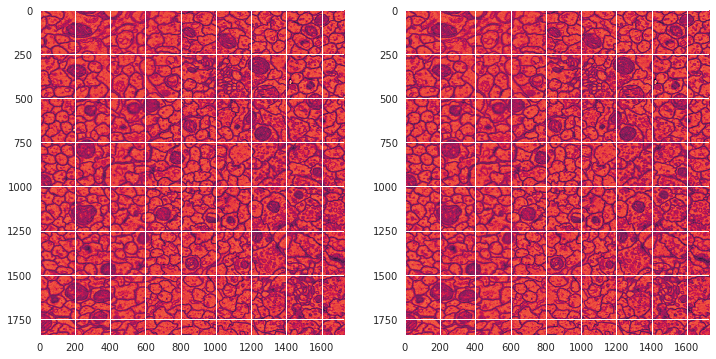

In [68]:
fig,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(img_A[0])
ax[1].imshow(mask_A[0])

### raw image

In [9]:
with h5py.File('data/public/sample_A_padded_20160501.hdf') as f:
    rawA = f['volumes/raw'][:]
    cleftsA = f['volumes/labels/clefts'][:]
    neuronidA = f['volumes/labels/neuron_ids'][:]

In [10]:
print (img_A.shape,mask_A.shape)
print (rawA.shape,cleftsA.shape,neuronidA.shape)

(153, 1842, 1727) (153, 1842, 1727)
(200, 3072, 3072) (125, 1250, 1250) (125, 1250, 1250)


In [19]:
rawA[:,276:1465,332:1451].shape

(200, 1189, 1119)

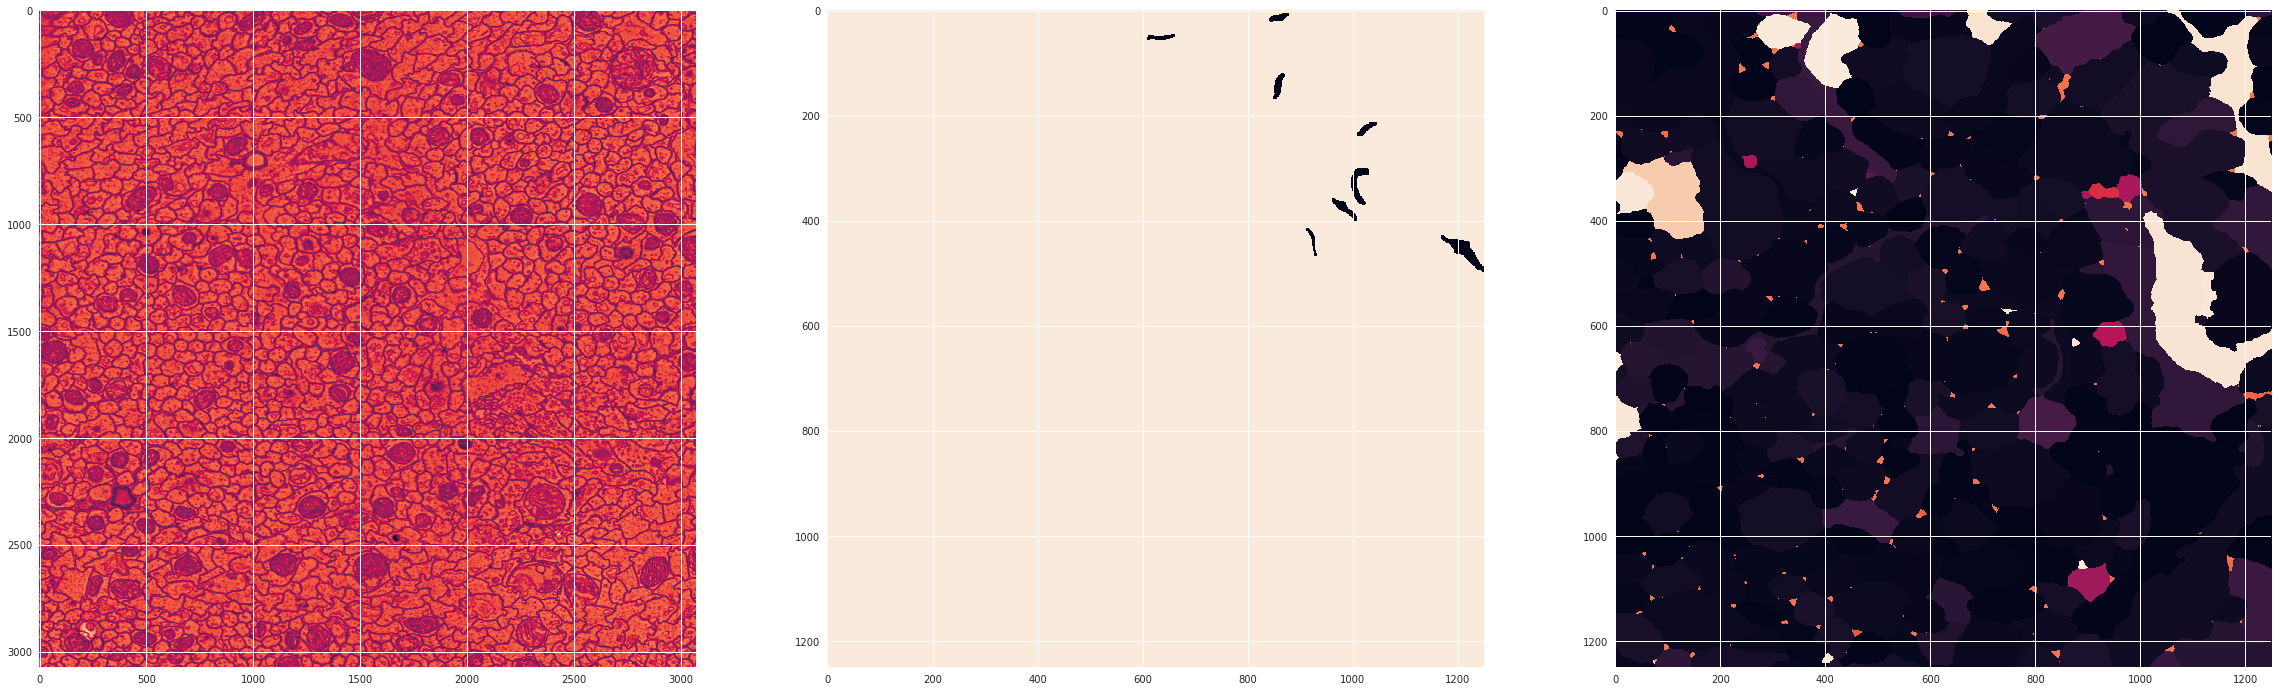

In [11]:
fig,ax = plt.subplots(1,3,figsize = (40,20))
ax[0].imshow(rawA[0])
ax[1].imshow(cleftsA[0])
ax[2].imshow(neuronidA[0])

In [13]:
np.loadtxt('data/align/crop_A_v2.txt',dtype='str')

array('276,1465,332,1451', dtype='<U17')

In [14]:
np.loadtxt('data/align/crop_A+_v2.txt',dtype='str')

array('290,1450,446,1485', dtype='<U17')

In [10]:
np.loadtxt('data/align/trans_A_v2.txt',dtype='str')

array(['0.000,0.000', '-0.572,0.467', '3.979,-0.399', '-1.314,-0.374',
       '-0.128,0.419', '2.670,-0.699', '2.392,-2.477', '2.339,-0.180',
       '-0.680,-0.286', '0.832,0.000', '1.409,-0.621', '1.256,0.345',
       '2.402,1.189', '0.659,-2.978', '-1.307,-0.229', '4.327,-1.531',
       '2.925,-2.558', '0.130,1.435', '1.342,-2.320', '0.538,-1.972',
       '-0.376,-0.143', '1.937,0.060', '1.624,-1.605', '5.170,-1.111',
       '-3.157,-0.171', '1.751,-0.660', '-2.890,-0.157', '3.918,-0.061',
       '0.645,-0.125', '2.163,0.271', '-2.755,0.071', '5.446,-2.111',
       '0.217,-0.077', '-1.018,-0.916', '0.057,-0.134', '-1.959,-1.212',
       '1.802,1.128', '1.318,-0.422', '-0.731,-0.690', '1.580,-1.106',
       '0.412,-0.188', '-0.097,-1.142', '3.629,0.100', '2.491,-1.032',
       '-3.006,1.033', '-1.255,-1.122', '1.011,-0.687', '-1.852,1.111',
       '7.857,-1.049', '-2.934,-1.546', '-1.571,-0.699', '1.697,-1.036',
       '0.212,-0.283', '1.287,-0.767', '0.720,1.403', '0.185,-0.141',
   

In [18]:
np.loadtxt('data/align/trans_A+_v2.txt',dtype='str')

array(['0,0', '-3.032,7.044', '0,-5', '0,-5', '-2.155,5.987',
       '3.378,0.495', '1.157,1.707', '0.467,2.897', '-3.009,4.049',
       '-1.402,2.128', '3.817,6.626', '-4.773,2.227', '-2.675,4.343',
       '1.913,2.046', '0,2', '0,2', '-4.28,3.828', '2.334,2.98',
       '0.115,-0.023', '4.737,0.972', '-3.243,1.735', '-1.332,4.093',
       '-4.742,4.666', '1.934,0.88', '0.499,3.036', '0.156,3.061',
       '-0.31,3.187', '-0.848,3.072', '0.351,2.473', '3.344,2.2',
       '-5.111,5.143', '-1.008,3.706', '-0.244,3.034', '0.778,1.882',
       '0.449,2.042', '1.373,1.268', '-4.136,3.672', '-0.012,2.728',
       '-0.497,1.293', '0.22,3.049', '-4.122,2.74', '1.66,4.866',
       '-0.269,2.232', '2.216,2.044', '-1.491,3.175', '-3.691,3.541',
       '-2.475,3.591', '0,2', '0,2', '-1.108,3.314', '0.428,0.987',
       '-2.007,2.67', '-1.468,2.633', '-1.948,4.02', '-1.093,2.087',
       '0.399,1.854', '-3.59,1.671', '-0.722,2.837', '-4.166,3.49',
       '5.688,2.088', '-0.37,1.848', '-1.35,2.954', 

# align script

- T_algin.m use trans_*.txt
- T_align.m 
    - raw volume -> cropped volume 
    - cropped volume -> raw volume
understand and rewrite script into python
write codes to transform neuron id and location

In [86]:
volume_name = np.array(['A','B','C','A+','B+','C+'])
bad_slices = np.array([[143],[1,29,30,58,59,91],[28,88,100],
    [65,93,94,122,123,125],[1,29,30,58,59,91],[28,88,100]])
#to be replaced? same name with bad_slice??
bb = np.array([[143],[1,29,30,58,59,91],[28,88,100]])
gg = np.array([[142],[0,28,31,57,60,90],[27,87,99],
    [64,92,95,121,124,126],[0,28,31,57,60,90],[27,87,99]])
#newly-aligned image size
new_align_sz = np.array([[1727,1842],[2069,1748],[1986,2036],
                         [1741,1912],[2898,1937],[1914,1983]]) 
# CREMI ground truth : 125,250,1250
# _v2_200: 200 margin from manual label ??


In [ ]:
np.pad(a, (2, 3), 'symmetric')

In [72]:
np.pad(img_A[0], (10,10), 'symmetric').shape

(1862, 1747)

In [73]:
img_A[0].shape

(1842, 1727)

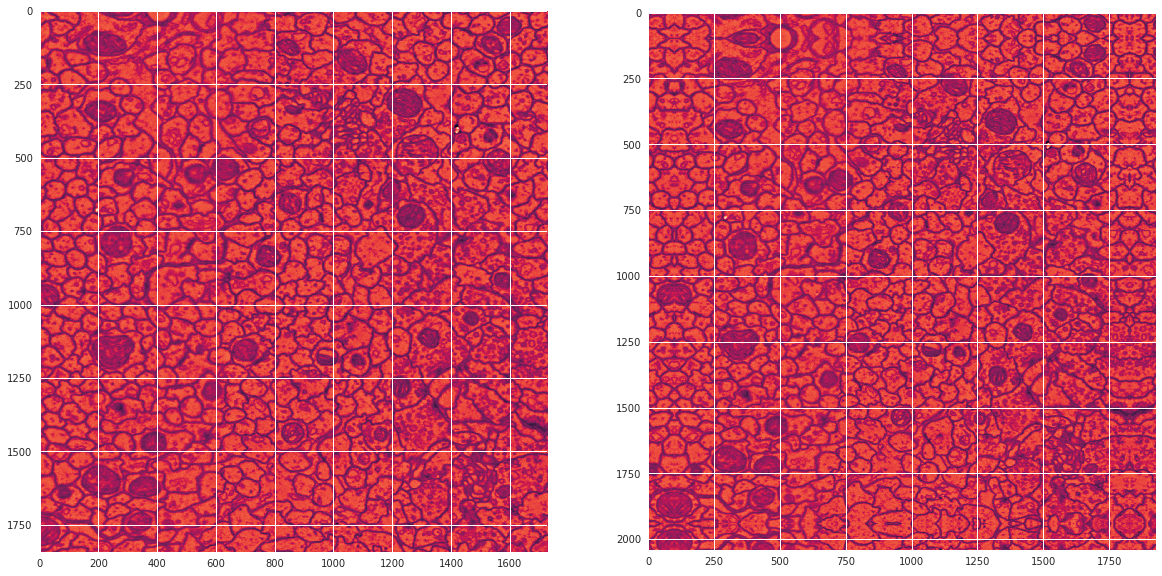

In [74]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(img_A[0])
ax[1].imshow(np.pad(img_A[0], (100,100), 'symmetric'))

In [19]:
ls data/public

sample_A+_padded_20160601.hdf  sample_B_padded_20160501.hdf
sample_A_padded_20160501.hdf   sample_C+_padded_20160601.hdf
sample_B+_padded_20160601.hdf  sample_C_padded_20160501.hdf


In [145]:
tmphdf5 = h5py.File('data/public/sample_A_padded_20160501.hdf')['volumes/raw'][:]

In [166]:
def origin2align(option='raw',nn=volume_name):
    '''
    orig -> align_v2_200 (translation)
    gray image(raw)
    seg/syn
    option:raw,syn
    '''
    if option=='raw':
        output = {}
        for nid in range(nn.shape[0]):
            vol = nn[nid]
            if len(vol)==2: 
                sn='06'
            else:
                sn = '05'
            if vol =='A':
                oo=24
            else:
                oo=23
            pw=0
            ph=0
            if vol[0]=='B':
                ph=200
            elif len(vol)==2:
                ph=700
            #print ('data/public/sample_'+vol+'_padded_2016'+sn+'01.hdf')
            pp = np.cumsum(np.loadtxt('data/align/trans_'+vol+'_v2.txt',delimiter=','),axis=0)
            pp = pp[76] - pp
            #ww=200;suf='v2'
            ww = np.ceil([np.max(pp[:,0]),np.max(pp[:,1]),-np.min(pp[:,0]),-np.min(pp[:,1])]).astype('int')+200
            #print (ww)
            im = h5py.File('data/public/sample_'+vol+'_padded_2016'+sn+'01.hdf')['volumes/raw'][:]
            #im = tmphdf5 #!
            out = np.zeros([153,1250+np.sum(ww[np.array([1,3])]).astype('int'),1250+np.sum(ww[np.array([0,2])]).astype('int')],dtype='uint8')
            suf='v2_200'
            for i in range(153):
                pd = np.round(pp[i,:]).astype('int')
                im2 = np.pad(im[oo+i,:,:],(ph,pw),'symmetric')
                #print (out.shape)
                out[i,:,:] = im2[(912+pd[1]-ww[1]+pw-1):(911+pd[1]+1250+ww[3]+pw),
                                (912+pd[0]-ww[0]+ph-1):(911+pd[0]+1250+ww[2]+ph)]
            out[bad_slices[nid],:,:]=out[gg[nid],:,:]  #in matlab write gg{nid}+1, attention
            output[nid] = out
        return output
    elif option=='syn':
        output_syn = {}
        output_seg = {}
        for nid in range(3):
            vol = nn[nid]
            if len(vol)==2: 
                sn='06'
            else:
                sn = '05'
            ph=0
            if vol[0]=='B':
                ph=200
            elif len(vol)==2:
                ph=700
            if vol =='A':
                oo=24
            else:
                oo=23
            syn = h5py.File('data/public/sample_'+vol+'_padded_2016'+sn+'01.hdf')['volumes/labels/clefts'][:]
            syn[syn>=1e10] = 0
            seg = h5py.File('data/public/sample_'+vol+'_padded_2016'+sn+'01.hdf')['volumes/labels/neuron_ids'][:]
            pp = np.cumsum(np.loadtxt('data/align/trans_'+vol+'_v2.txt',delimiter=','),axis=0)
            pp = pp[76] - pp
            ww = np.ceil([np.max(pp[:,0]),np.max(pp[:,1]),-np.min(pp[:,0]),-np.min(pp[:,1])]).astype('int')+200
            seg_o = np.zeros([153,1250+np.sum(ww[np.array([0,2])]).astype('int'),1250+np.sum(ww[np.array([1,3])]).astype('int')],dtype='uint64')
            syn_o = np.zeros([153,1250+np.sum(ww[np.array([0,2])]).astype('int'),1250+np.sum(ww[np.array([1,3])]).astype('int')],dtype='uint16')
            for i in range(125):
                pd = np.round(pp[i+14-1,:]).astype('int')
                tmp = np.zeros([3075+ph,3075])
                tmp[912-1:911+1250,912-1:911+1250] = seg[i,:,:]
                seg_o[i+14-1,:,:] = tmp[(912+pd[0]-ww[0]-1):(911+pd[0]+1250+ww[2]),
                                (912+pd[1]-ww[1]-1):(911+pd[1]+1250+ww[3])]
                tmp[912-1:911+1250,912-1:911+1250] = seg[i,:,:]
                syn_o[i+14-1,:,:] = tmp[(912+pd[0]-ww[0]-1):(911+pd[0]+1250+ww[2]),
                                (912+pd[1]-ww[1]-1):(911+pd[1]+1250+ww[3])]
            seg_o[bad_slices[nid],:,:]=seg_o[gg[nid],:,:]
            syn_o[bad_slices[nid],:,:]=syn_o[gg[nid],:,:]
            output_syn[nid] = syn_o
            output_seg[nid] = seg_o
        return output_syn,output_seg

In [168]:
testt,testtt = origin2align(option='syn',nn=volume_name)

In [179]:
rawtt = origin2align(option='raw',nn=volume_name[:1])

In [180]:
rawtt[0].shape

(153, 1842, 1727)

In [175]:
print (testt[0].shape)
print (testt[1].shape)
print (testt[2].shape)
print (testtt[0].shape)
print (testtt[1].shape)
print (testtt[2].shape)

(153, 1727, 1842)
(153, 2069, 1748)
(153, 1986, 2036)
(153, 1727, 1842)
(153, 2069, 1748)
(153, 1986, 2036)


In [177]:
h5py.File('data/cremi/images/im_A_v2_200.h5')['main'][:].shape

(153, 1842, 1727)

In [178]:
h5py.File('data/cremi/gt-syn/syn_A_v2_200.h5')['main'][:].shape 

(153, 1842, 1727)

In [117]:
def align2origin(option='raw',nn=volume_name,sz = new_align_sz):
    for nid in range(6):
        vol = nn[nid]
        if len(vol)==2: 
            sn='06'
        else:
            sn = '05'
        % load/crop result
        result = h5py.File('data/cremi/images/im_'+vol+'_v2_200.h5')['main'][:]
        sz_r = result.shape
        sz_bd = np.round((sz_r - np.array([125,sz[i][0]-400,sz[i][0]-400]))/2.).astype('int')
        result = result[sz_bd[0]:-sz_bd[0], sz_bd[1]:-sz_bd[1], sz_bd[2]:-sz_bd[2]]; 

        pp = np.cumsum(np.loadtxt('data/align/trans_'+vol+'_v2.txt',delimiter=','),axis=0)
        pp = pp[76] - pp
        ww = np.ceil([np.max(pp[:,0]),np.max(pp[:,1]),-np.min(pp[:,0]),-np.min(pp[:,1])]).astype('int')
        pp=pp[14:-14,:]
        # 1250+200*2
        result_o = np.zeros([125,1250,1250],'uint16');
        for i in range(125):
            pd = np.round(pp[i+14-1,:]).astype('int') 

            result_o[i,:,:] = result[(pd[0]+ww[0]-1):(pd[0]+1250+ww[0]),
                                     (pd[1]+ww[1]-1):(pd[1]+1250+ww[1])]

In [116]:
np.eye(10)[3:-4] #(4,end-4)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [104]:
i=0
np.round((np.zeros([3,4,5]).shape - np.array([125,new_align_sz[i][0]-400,new_align_sz[i][0]-400]))/2.).astype('int')


array([ -61, -662, -661])

In [77]:
np.round(ttttt[76,:])

array([0., 0.])

In [34]:
testtt =np.cumsum(np.loadtxt('data/align/trans_A_v2.txt',delimiter=','),axis=0)

In [54]:
ttttt =testtt[76] - testtt
ww = np.ceil([np.max(ttttt[:,0]),np.max(ttttt[:,1]),-np.min(ttttt[:,0]),-np.min(ttttt[:,1])])+200

In [61]:
ww[np.array([1,3])]

array([210., 382.])

In [63]:
np.zeros([153,1250+np.sum(ww[np.array([0,2])]).astype('int'),1250+np.sum(ww[np.array([1,3])]).astype('int')],dtype='uint8').shape


(153, 1727, 1842)

In [42]:
np.zeros([1250,1250,153],dtype='uint8').shape

(1250, 1250, 153)

In [ ]:

        for nid=1:3
            vol = nn{nid}
            sn='05';if numel(vol)==2;sn='06';end
            oo=23; if strcmp(vol,'A');oo=24;end
            syn = h5read([D0 'images/sample_' vol '.hdf'],'/volumes/labels/clefts');
            syn(syn>1e10)=0;
            seg = h5read([D0 'images/sample_' vol '.hdf'],'/volumes/labels/neuron_ids');
            pp=cumsum(load(['align/trans_' vol '_v2.txt']),1);
            pp=-bsxfun(@minus,pp,pp(77,:));
            % 1250+200*2
            %ww=200;suf='v2';
            ww = ceil([max(pp) -min(pp)])+200;suf='v2_200';
            seg_o=zeros([1250+sum(ww([1,3])),1250+sum(ww([2,4])),153],'uint64');
            syn_o=zeros([1250+sum(ww([1,3])),1250+sum(ww([2,4])),153],'uint16');
            for i=1:125
                pd = round(pp(i+14,:)); 
                tmp = zeros(3075+ph,3075);

                tmp(912:911+1250,912:911+1250) = seg(:,:,i);
                seg_o(:,:,i+14) = tmp((912+pd(1)-ww(1)):(911+pd(1)+1250+ww(3)),...
                                (912+pd(2)-ww(2)):(911+pd(2)+1250+ww(4))); 
                tmp(912:911+1250,912:911+1250) = syn(:,:,i);
                syn_o(:,:,i+14) = tmp((912+pd(1)-ww(1)):(911+pd(1)+1250+ww(3)),...
                                (912+pd(2)-ww(2)):(911+pd(2)+1250+ww(4))); 
            end
            seg_o(:,:,bb{nid}+1)=seg_o(:,:,gg{nid}+1);
            syn_o(:,:,bb{nid}+1)=syn_o(:,:,gg{nid}+1);
            %U_h5write(['../data/cremi/align_v2/seg_' sprintf('%s_%s.h5',vol,suf)],'/main',seg_o,5,'uint64');
            %U_h5write(['../data/cremi/align_v2/syn_' sprintf('%s_%s.h5',vol,suf)],'/main',syn_o,5,'uint16');
        end
    end
    
    
    
    
    
case 2 % align_v2_200 (translation) -> orig
    switch tid
    case 2.1 % seg/syn
        for nid=1:6
            vol = nn{nid}
            sn='05';if numel(vol)==2;sn='06';end
            % load/crop result
            result = h5read(['results/sample_' vol '.hdf'],'/main');
            sz_r = size(result);
            sz_bd = round((sz_r-[sz{nid}-400 125])/2);
            result = result(sz_bd(1)+1:end-sz_bd(1), sz_bd(2)+1:end-sz_bd(2), sz_bd(3)+1:end-sz_bd(3)); 

            pp=cumsum(load(['align/trans_' vol '_v2.txt']),1);
            pp=bsxfun(@minus,pp,pp(77,:));
            ww = ceil([max(pp) -min(pp)]);
            pp=pp(15:end-14,:);
            % 1250+200*2
            result_o = zeros([1250,1250,125],'uint16');
            for i=1:125
                pd = round(pp(i+14,:)); 

                result_o(:,:,i) = result((pd(1)+ww(1)):(pd(1)+1250+ww(1)),...
                                         (pd(2)+ww(2)):(pd(2)+1250+ww(2))); 
            end
            %U_h5write(['../data/cremi/align_v2/syn_' sprintf('%s_%s.h5',vol,suf)],'/main',syn_o,5,'uint16');
        end
    end
end